In [1]:
import os
import sys 
import numpy as np
import matplotlib.pyplot as plt
import sys 
import mdtraj
from nglview import show_ase, show_file, show_mdtraj
import torch
from scripts.gnn_rdf_aa import *

from scripts.infer_topology import generate_subgraphs

_ColormakerRegistry()

In [2]:
#generate_subgraphs(atoms)

In [4]:
from ase.geometry import wrap_positions

box = np.load('../data/water_aimd/box_0.npy')[-1].reshape(-1, 3)
xyz = np.load('../data/water_aimd/coord_0.npy')[-1].reshape(-1, 3)

atoms = Atoms(positions=xyz, cell=box)
z =  [8] * 64 + [1] * 64 * 2 

positions = wrap_positions(xyz, box)
atoms.set_positions(positions)
atoms.set_atomic_numbers(z)

from torchmd.system import System
system = System(atoms, device=3)

In [5]:
show_ase(atoms)

NGLWidget()

In [6]:
# compute ADF 

from ase.geometry import wrap_positions

atoms = Atoms(positions=xyz[:64], cell=box)
z =  [8] * 64

positions = wrap_positions(xyz[:64], box)
atoms.set_positions(positions)
atoms.set_atomic_numbers(z)

from torchmd.system import System
system = System(atoms, device=3)

In [28]:
from scripts.gnn_rdf_cg_water_angle import angle_distribution

cos_start = -0.99
cos_end = 0.99

angle_obs_train = angle_distribution(system, 60, (0, 3.12), cutoff=3.7)

In [29]:
traj = np.load('../data/water_aimd/coord_0.npy')
    

In [30]:
device = 3
traj = traj.reshape(100, -1, 3)
o_traj = traj[:, :64, :]
o_traj = torch.Tensor(o_traj).to(device)

In [31]:

for i, snapshot in enumerate(o_traj):
    bins, sim_angle_density, cos = angle_obs_train(snapshot)
    
    if i == 0:
        all_angle_density = sim_angle_density
    else:
        all_angle_density += sim_angle_density
        
all_angle_density /= o_traj.shape[0]

In [32]:
all_angle_density

tensor([4.1759e-43, 1.2648e-37, 1.4305e-32, 6.0743e-28, 9.7639e-24, 6.0089e-20,
        1.4367e-16, 1.3586e-13, 5.1879e-11, 8.1977e-09, 5.5346e-07, 1.6705e-05,
        2.3950e-04, 1.7460e-03, 6.9079e-03, 1.5847e-02, 2.3002e-02, 2.3953e-02,
        2.1090e-02, 1.8690e-02, 1.8395e-02, 1.9898e-02, 2.2468e-02, 2.5183e-02,
        2.7292e-02, 2.8998e-02, 3.0712e-02, 3.2438e-02, 3.4088e-02, 3.5355e-02,
        3.5826e-02, 3.5803e-02, 3.5792e-02, 3.5859e-02, 3.5789e-02, 3.5267e-02,
        3.4176e-02, 3.2740e-02, 3.1298e-02, 2.9654e-02, 2.7785e-02, 2.6011e-02,
        2.4291e-02, 2.2534e-02, 2.0888e-02, 1.9275e-02, 1.7452e-02, 1.5944e-02,
        1.4910e-02, 1.3798e-02, 1.2484e-02, 1.1164e-02, 9.8862e-03, 8.7304e-03,
        7.7100e-03, 6.6165e-03, 5.2304e-03, 3.6387e-03, 2.1624e-03, 9.6441e-04],
       device='cuda:3')

In [33]:
def plot_angle(sim_angle, exp_angle, cos_start, cos_angle, fname, path, nbins_angle):
    bins = np.linspace(cos_start, cos_end, nbins_angle)
    plt.plot( bins * 180/np.pi, sim_angle.detach().cpu(), linewidth=4, alpha=0.6, label='sim.' )
    plt.plot( bins * 180/np.pi, exp_angle.detach().cpu(), linewidth=2,linestyle='--', c='black', label='exp.')
    plt.show()
    plt.savefig(path + '/angle_{}.jpg'.format(fname), bbox_inches='tight')
    plt.close() 

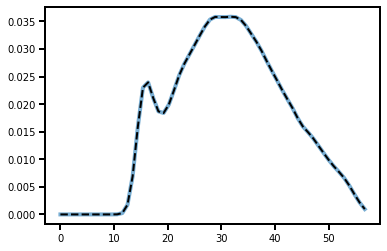

In [35]:
plot_angle(all_angle_density, all_angle_density, 0, 3.14, "test", path="./metadta", nbins_angle=60)